In [3]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [4]:
!pip install --upgrade seaborn
!pip install --upgrade python

ERROR: Could not find a version that satisfies the requirement python (from versions: none)
ERROR: No matching distribution found for python


In [5]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import math
from pandas_profiling import ProfileReport

In [6]:
# This is to supress the warning messages (if any) generated in code
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [7]:
# Read the Dataset into DataFrame
df = pd.read_csv('/content/Final_upated_Flipkart_washing_machine.csv')

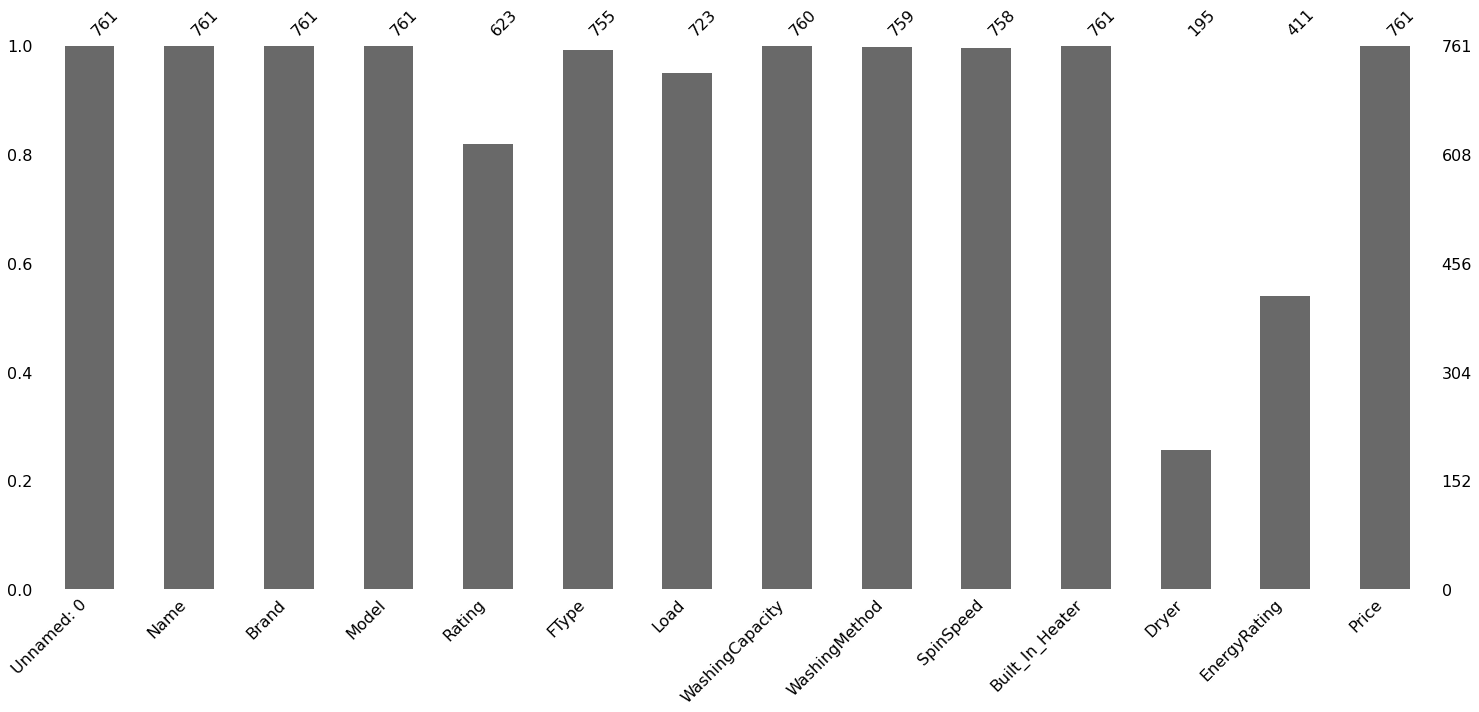

In [8]:
msno.bar(df)

In [9]:
#Percentage of missing values for all columns 
null_count=round(100*(df.isnull().sum()/len(df.index)),2)
null_count

Unnamed: 0          0.00
Name                0.00
Brand               0.00
Model               0.00
Rating             18.13
FType               0.79
Load                4.99
WashingCapacity     0.13
WashingMethod       0.26
SpinSpeed           0.39
Built_In_Heater     0.00
Dryer              74.38
EnergyRating       45.99
Price               0.00
dtype: float64

In [10]:
df.drop('Unnamed: 0', inplace=True, axis=1)

In [11]:
df

Name  ...  Price
0    SAMSUNG 6 kg 5 Star Inverter with Hygiene Stea...  ...  22399
1    Candes 6.5 kg Semi Automatic Top Load Red, Whi...  ...   6799
2    SAMSUNG 6.5 kg Diamond Drum feature Fully Auto...  ...  14499
3    SAMSUNG 7.2 kg with Double Storm Technology Se...  ...   9699
4    Whirlpool 7 kg 5 Star,Turbo Scrub Technology S...  ...  10240
..                                                 ...  ...    ...
756  IFB 7 kg Fully Automatic Front Load with In-bu...  ...  39000
757  LG 7 kg Fully Automatic Front Load with In-bui...  ...  35990
758  Whirlpool 8 kg Semi Automatic Top Load Red  (S...  ...  13500
759  SAMSUNG 8.5 kg 5 star Semi Automatic Top Load ...  ...  13599
760  Whirlpool 7.5 kg Semi Automatic Top Load Red  ...  ...  11900

[761 rows x 13 columns]

count       761.000000
mean      20847.763469
std       12325.988837
min        4990.000000
25%       12800.000000
50%       16990.000000
75%       26899.000000
max      117000.000000
Name: Price, dtype: float64


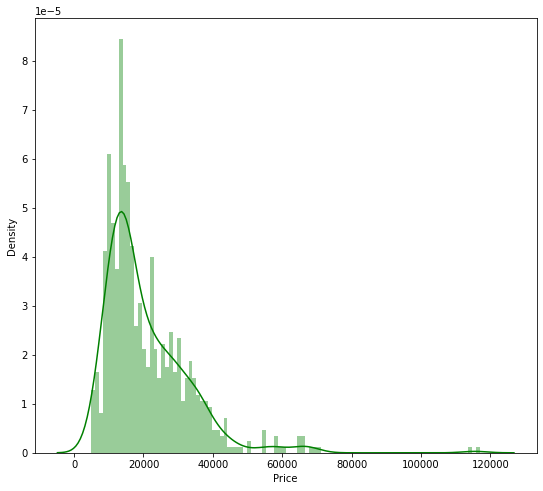

In [12]:
print(df['Price'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['Price'], color='g', bins=100, hist_kws={'alpha': 0.4});

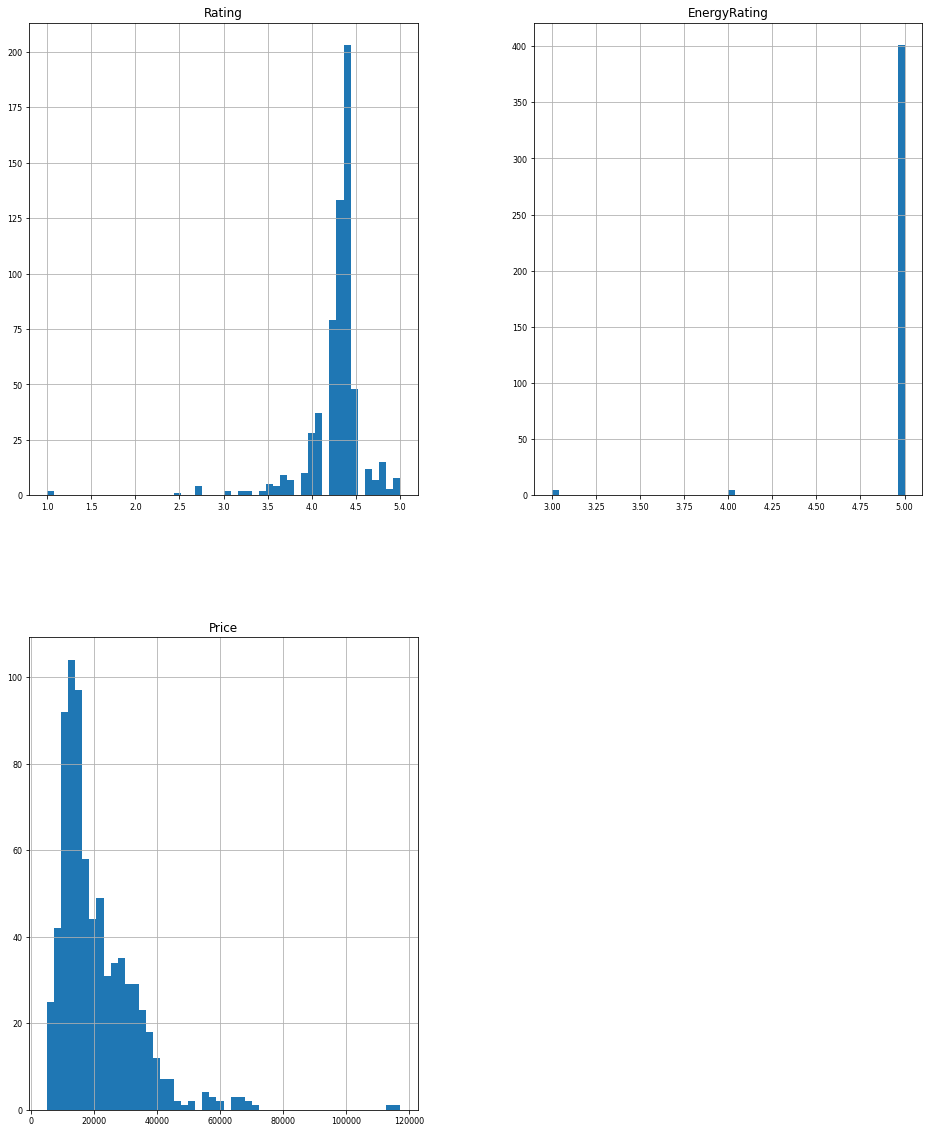

In [13]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

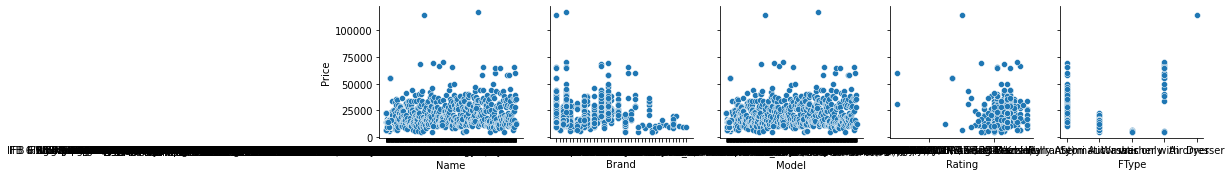

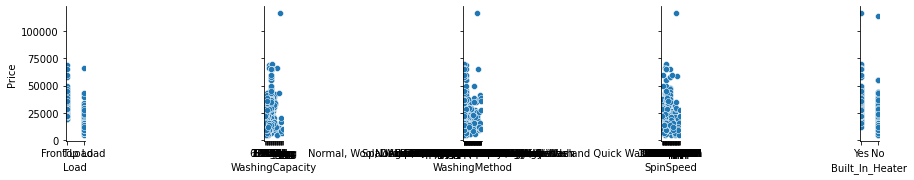

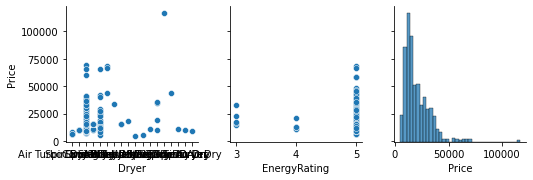

In [14]:
for i in range(0, len(df.columns), 5):
    sns.pairplot(data=df,
                x_vars=df.columns[i:i+5],
                y_vars=['Price'])

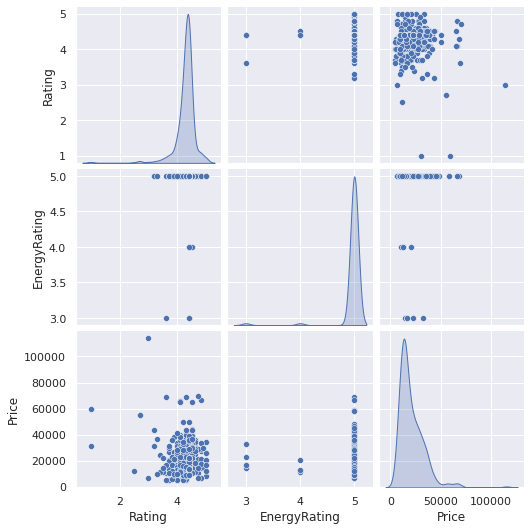

In [15]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
cData_attr = df
sns.pairplot(cData_attr, diag_kind='kde')   
# to plot density curve instead of the histogram on the diagram # Kernel density estimation(kde)

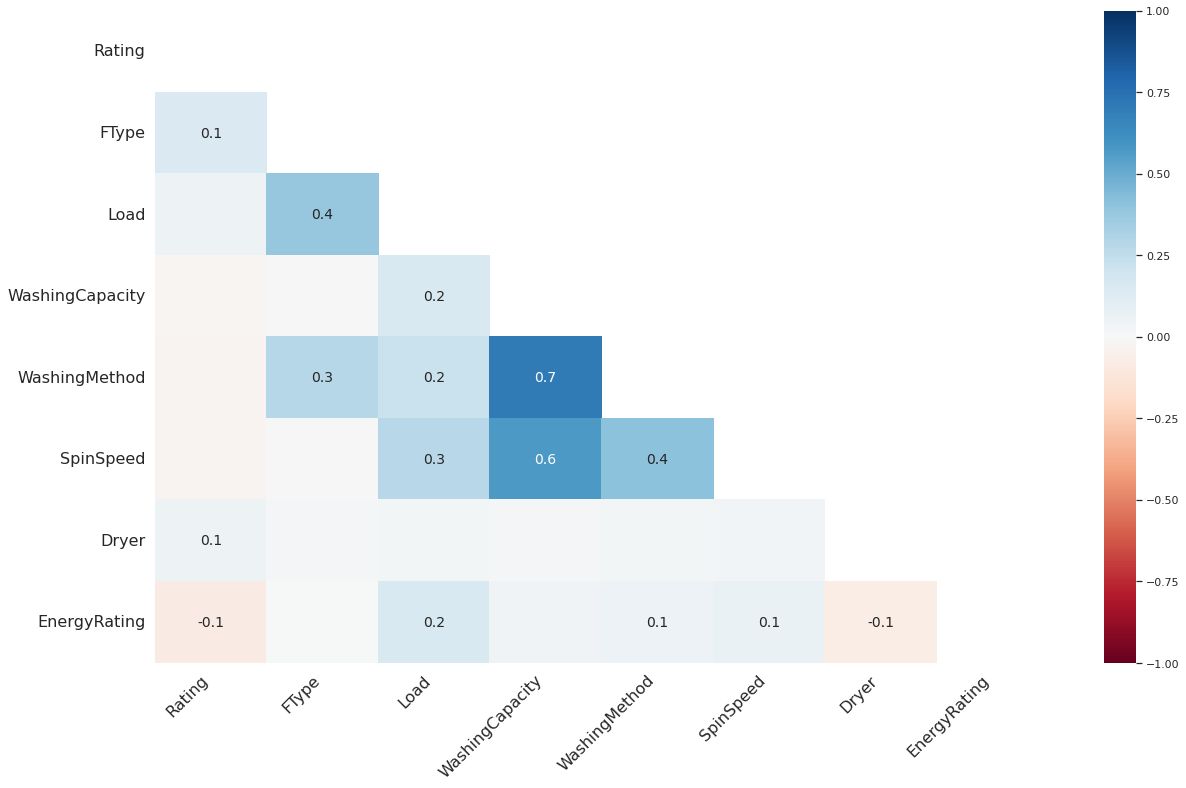

In [16]:
msno.heatmap(df)

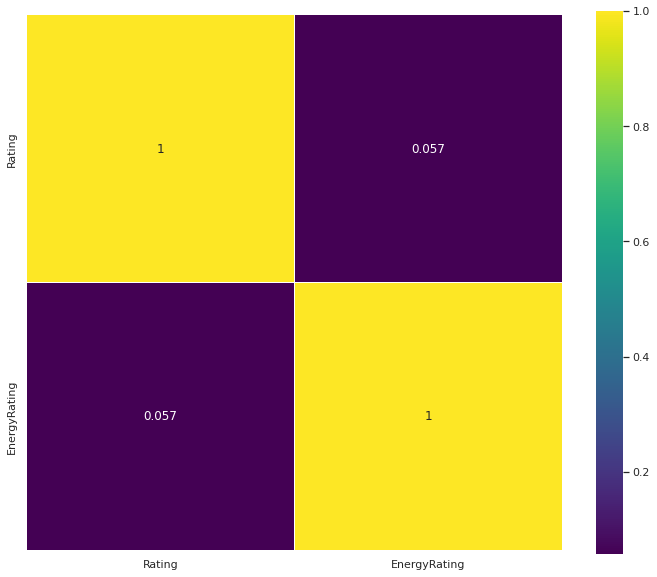

In [17]:
corr = df.drop('Price', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr, 
            cmap='viridis', linewidths=0.1,
            annot=True, square=True);

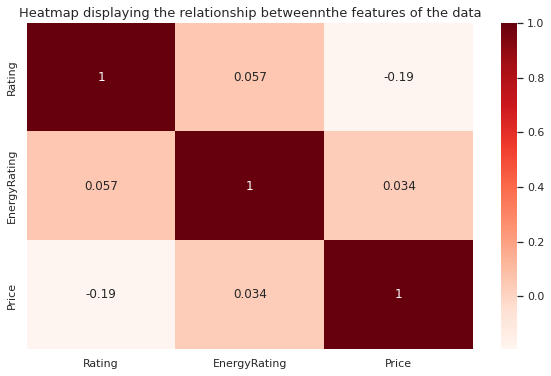

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship betweennthe features of the data',
         fontsize=13)
plt.show()

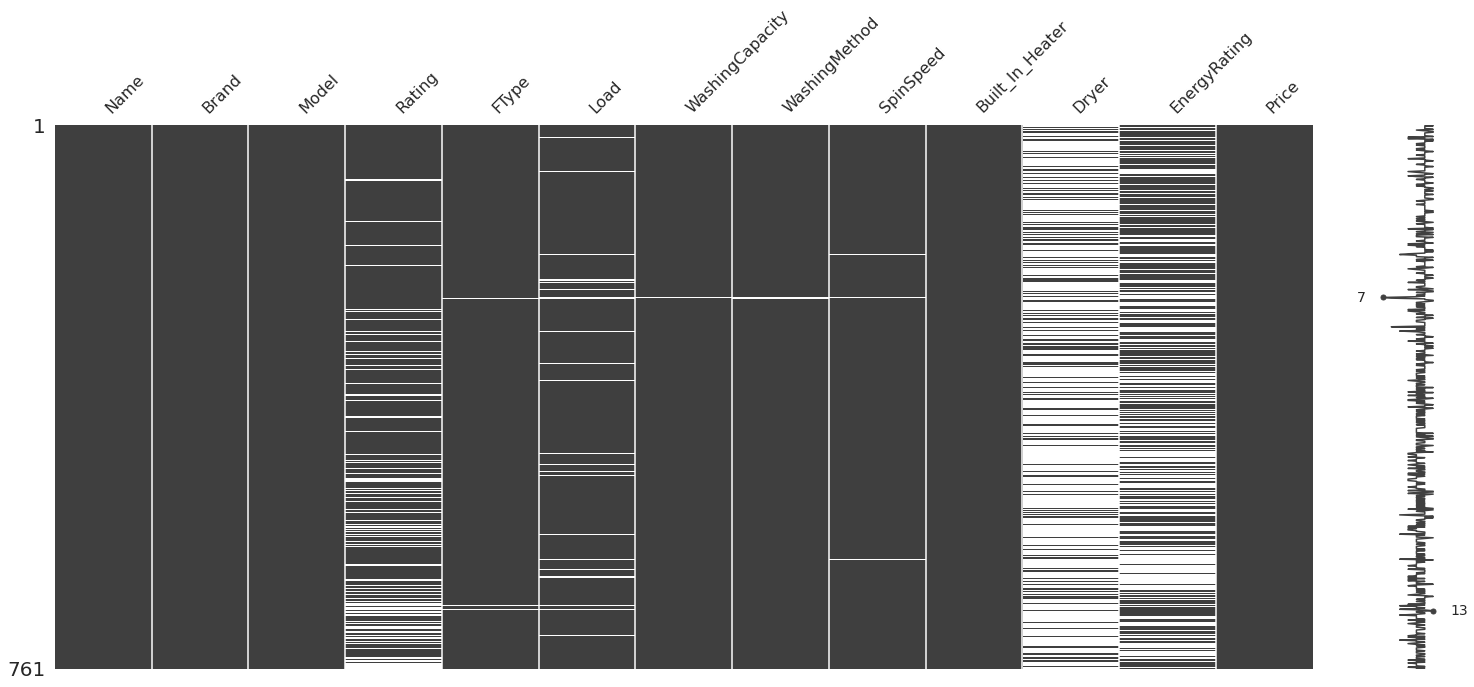

In [19]:
msno.matrix(df)


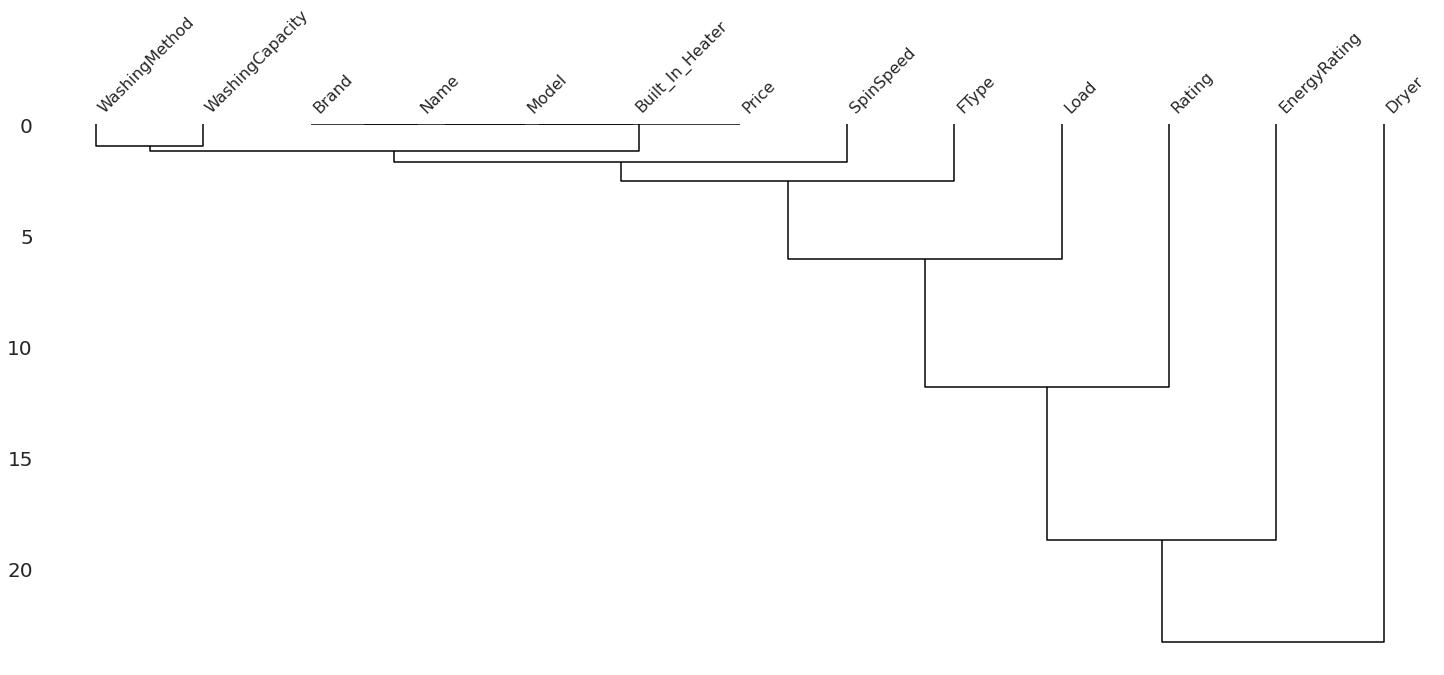

In [20]:
msno.dendrogram(df)

In [ ]:
proflie = ProfileReport(df, title="BEFORE EDA REPORT", html={'style':{'full_width':True}})

In [ ]:
proflie.to_notebook_iframe()

In [21]:
null_count=round(100*(df.isnull().sum()/len(df.index)),2)
null_count

Name                0.00
Brand               0.00
Model               0.00
Rating             18.13
FType               0.79
Load                4.99
WashingCapacity     0.13
WashingMethod       0.26
SpinSpeed           0.39
Built_In_Heater     0.00
Dryer              74.38
EnergyRating       45.99
Price               0.00
dtype: float64

In [22]:
display(df.dropna(subset=['Rating','EnergyRating','Dryer'], how='all',inplace=True))

None

In [23]:
df.Dryer.value_counts()

Spin Dry                      98
Air Dry                       34
Air Turbo Drying System       20
Swift Dry                     15
Spin Dryer                     9
Spin                           4
Condenser Drying               3
Wind Jet Dry                   2
Turbo Dry                      1
Spin Air Dry                   1
Plastic Spin Dryer             1
Turbo Air Dry                  1
Hot Wind                       1
70 % Air Dryer                 1
Stainless Steel Spin Dryer     1
No                             1
Max Dry                        1
Steam Dry                      1
Name: Dryer, dtype: int64

In [24]:
df.Dryer.unique()

array([nan, 'Spin Dryer', 'Air Turbo Drying System', 'Spin Dry',
       'Swift Dry', 'Air Dry', 'Condenser Drying', 'Hot Wind',
       'Wind Jet Dry', 'No', 'Plastic Spin Dryer',
       'Stainless Steel Spin Dryer', 'Max Dry', 'Spin', 'Steam Dry',
       '70 % Air Dryer', 'Turbo Air Dry', 'Turbo Dry', 'Spin Air Dry'],
      dtype=object)

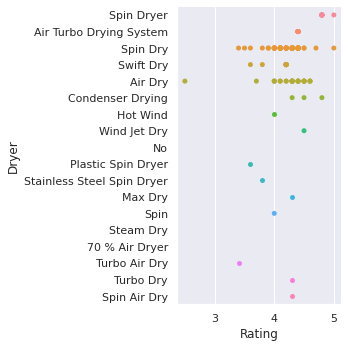

In [25]:
sns.catplot(x="Rating", y="Dryer", jitter=False, data=df)

In [26]:
df.Dryer.value_counts()

Spin Dry                      98
Air Dry                       34
Air Turbo Drying System       20
Swift Dry                     15
Spin Dryer                     9
Spin                           4
Condenser Drying               3
Wind Jet Dry                   2
Turbo Dry                      1
Spin Air Dry                   1
Plastic Spin Dryer             1
Turbo Air Dry                  1
Hot Wind                       1
70 % Air Dryer                 1
Stainless Steel Spin Dryer     1
No                             1
Max Dry                        1
Steam Dry                      1
Name: Dryer, dtype: int64

In [27]:
df.Brand.value_counts()

SAMSUNG                                          176
LG                                                86
Whirlpool                                         82
BOSCH                                             51
Haier                                             40
IFB                                               39
Lloyd                                             32
MarQ By Flipkart                                  27
Godrej                                            27
Panasonic                                         22
Voltas Beko                                       20
ONIDA                                             18
Galanz                                            12
MOTOROLA                                          11
Candes                                             9
Sansui                                             6
Thomson                                            5
Midea                                              5
Siemens                                       

In [28]:
## Assigning the NaN 
df.loc[(df.Dryer.isnull())&(df.Brand=='LG'),'Dryer']="Air Dry"
df.loc[(df.Dryer.isnull())&(df.Brand=='LLoyd'),'Dryer']="Swift Dry"
df.loc[(df.Dryer.isnull())&(df.Brand=='SAMSUNG'),'Dryer']="Air Turbo Drying System"
df.loc[(df.Dryer.isnull())&(df.Brand=='Panasonic'),'Dryer']="Swift Dry"
df.loc[(df.Dryer.isnull())&(df.Brand=='AISEN'),'Dryer']="Air Dry"
df.loc[(df.Dryer.isnull())&(df.Brand=='Akai'),'Dryer']="Air Dry"
df.loc[(df.Dryer.isnull())&(df.Brand=='BOSCH'),'Dryer']="Air Dry"
df.loc[(df.Dryer.isnull())&(df.Brand=='BPL'),'Dryer']="Air Dry"
df.loc[(df.Dryer.isnull())&(df.Brand=='Candes'),'Dryer']="Air Dry"
df.loc[(df.Dryer.isnull())&(df.Brand=='CANDY'),'Dryer']="Air Dry"
df.loc[(df.Dryer.isnull())&(df.Brand=='Croma'),'Dryer']="Air Dry"
df.loc[(df.Dryer.isnull())&(df.Brand=='Daenyx'),'Dryer']="Air Dry"
df.loc[(df.Dryer.isnull())&(df.Brand=='DMR'),'Dryer']="Air Dry"
df.loc[(df.Dryer.isnull())&(df.Brand=='Dvizio'),'Dryer']="Air Dry"
df.loc[(df.Dryer.isnull())&(df.Brand=='Electrolux'),'Dryer']="Air Dry"
df.loc[(df.Dryer.isnull())&(df.Brand=='Galanz'),'Dryer']="Air Dry"
df.loc[(df.Dryer.isnull())&(df.Brand=='Godrej'),'Dryer']="Air Dry"
df.loc[(df.Dryer.isnull())&(df.Brand=='Hafele'),'Dryer']="Air Dry"
df.loc[(df.Dryer.isnull())&(df.Brand=='Haier'),'Dryer']="Air Dry"
df.loc[(df.Dryer.isnull())&(df.Brand=='IFB'),'Dryer']="Air Dry"
df.loc[(df.Dryer.isnull())&(df.Brand=='iFFALCON'),'Dryer']="Air Dry"
df.loc[(df.Dryer.isnull())&(df.Brand=='IMPEX'),'Dryer']="Air Dry"
df.loc[(df.Dryer.isnull())&(df.Brand=='Intex'),'Dryer']="Air Dry"
df.loc[(df.Dryer.isnull())&(df.Brand=='Lifelong'),'Dryer']="Air Dry"
df.loc[(df.Dryer.isnull())&(df.Brand=='Lloyd'),'Dryer']="Air Dry"
df.loc[(df.Dryer.isnull())&(df.Brand=='MarQ By Flipkart'),'Dryer']="Air Dry"
df.loc[(df.Dryer.isnull())&(df.Brand=='Midea'),'Dryer']="Air Dry"
df.loc[(df.Dryer.isnull())&(df.Brand=='MITASHI'),'Dryer']="Air Dry"
df.loc[(df.Dryer.isnull())&(df.Brand=='MOTOROLA'),'Dryer']="Air Dry"
df.loc[(df.Dryer.isnull())&(df.Brand=='RGL'),'Dryer']="Air Dry"
df.loc[(df.Dryer.isnull())&(df.Brand=='Sansui'),'Dryer']="Air Dry"
df.loc[(df.Dryer.isnull())&(df.Brand=='Siemens'),'Dryer']="Air Dry"
df.loc[(df.Dryer.isnull())&(df.Brand=='TCL'),'Dryer']="Air Dry"
df.loc[(df.Dryer.isnull())&(df.Brand=='Thomson'),'Dryer']="Air Dry"
df.loc[(df.Dryer.isnull())&(df.Brand=='TOSHIBA'),'Dryer']="Air Dry"
df.loc[(df.Dryer.isnull())&(df.Brand=='Voltas Beko'),'Dryer']="Air Dry"
df.loc[(df.Dryer.isnull())&(df.Brand=='Whirlpool'),'Dryer']="Air Dry"
df.loc[(df.Dryer.isnull())&(df.Brand=='White Westinghouse (Trademark by Electtrolux)'),'Dryer']="Air Dry"
#df.loc[(df.Dryer.isnull())&(df.Brand=='ONIDA'),'Dryer']="Air Dry"
df.Dryer = df.Dryer.fillna(method='ffill')

In [29]:
df

Name  ...  Price
0    SAMSUNG 6 kg 5 Star Inverter with Hygiene Stea...  ...  22399
1    Candes 6.5 kg Semi Automatic Top Load Red, Whi...  ...   6799
2    SAMSUNG 6.5 kg Diamond Drum feature Fully Auto...  ...  14499
3    SAMSUNG 7.2 kg with Double Storm Technology Se...  ...   9699
4    Whirlpool 7 kg 5 Star,Turbo Scrub Technology S...  ...  10240
..                                                 ...  ...    ...
755  SAMSUNG 6.2 kg with Monsoon Feature Fully Auto...  ...  13900
756  IFB 7 kg Fully Automatic Front Load with In-bu...  ...  39000
757  LG 7 kg Fully Automatic Front Load with In-bui...  ...  35990
759  SAMSUNG 8.5 kg 5 star Semi Automatic Top Load ...  ...  13599
760  Whirlpool 7.5 kg Semi Automatic Top Load Red  ...  ...  11900

[719 rows x 13 columns]

In [30]:
df.Dryer.value_counts()

Air Dry                       373
Air Turbo Drying System       180
Spin Dry                      101
Swift Dry                      36
Spin Dryer                      9
Spin                            4
Condenser Drying                4
Wind Jet Dry                    2
Turbo Dry                       1
Spin Air Dry                    1
Plastic Spin Dryer              1
Turbo Air Dry                   1
Hot Wind                        1
70 % Air Dryer                  1
Stainless Steel Spin Dryer      1
No                              1
Max Dry                         1
Steam Dry                       1
Name: Dryer, dtype: int64

In [31]:
null_count=round(100*(df.isnull().sum()/len(df.index)),2)
null_count

Name                0.00
Brand               0.00
Model               0.00
Rating             13.35
FType               0.70
Load                4.73
WashingCapacity     0.14
WashingMethod       0.28
SpinSpeed           0.42
Built_In_Heater     0.00
Dryer               0.00
EnergyRating       42.84
Price               0.00
dtype: float64

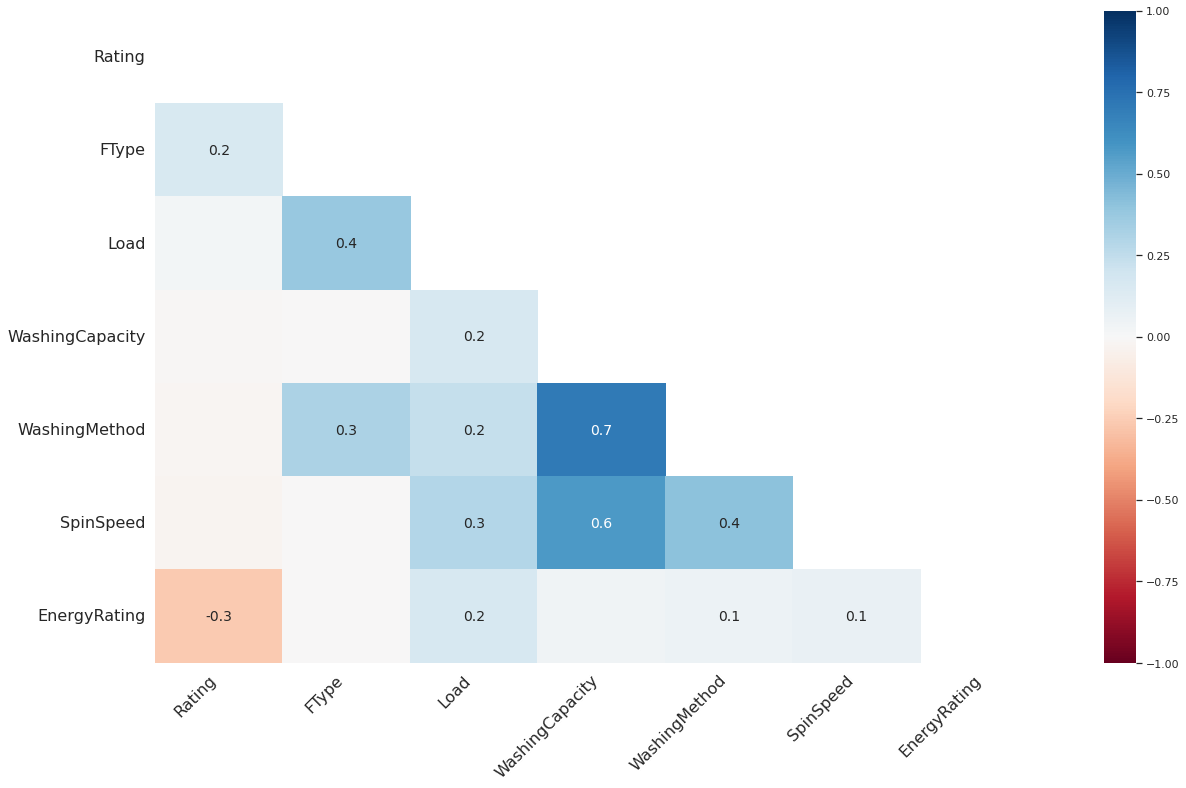

In [32]:
msno.heatmap(df)

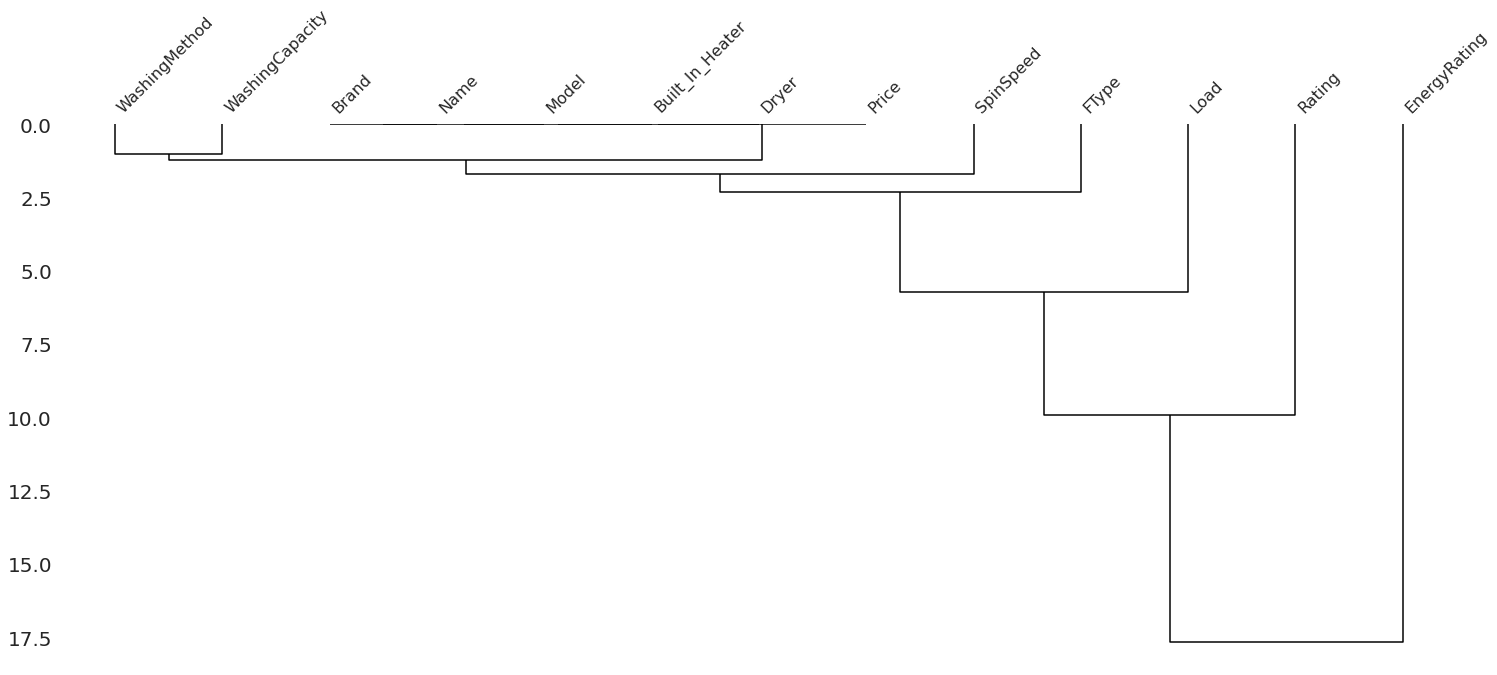

In [33]:
msno.dendrogram(df)

In [34]:
df.WashingCapacity.unique()

array(['6 kg', '6.5 kg', '7.2 kg', '7 kg', '7.5 kg', '6.2 kg', '8.5 kg',
       '10.2 kg', '9 kg', '8 kg', '10.5 kg', '11 kg', '9.5 kg', '10 kg',
       nan, '12 kg', '8.2 kg', '7.6 kg', '18 kg', '3 kg', '4.6 kg',
       '5.8 kg', '16 kg', '5.2 kg', '6.8 kg', '3.6 kg', '5 kg'],
      dtype=object)

In [35]:
# initializing unit 
#unit = "kg"
# Remove Units from Value List
# Using replace() + strip() + list comprehension
df['WashingCapacity'] = [str(x).replace('kg',' ') for x in df['WashingCapacity']]
#df['WashingCapacity'].str.translate(str.maketrans({'kg':''})).astype(float) 
df['WashingCapacity'] = df['WashingCapacity'].astype(float)

In [36]:
df.WashingCapacity.unique()

array([ 6. ,  6.5,  7.2,  7. ,  7.5,  6.2,  8.5, 10.2,  9. ,  8. , 10.5,
       11. ,  9.5, 10. ,  nan, 12. ,  8.2,  7.6, 18. ,  3. ,  4.6,  5.8,
       16. ,  5.2,  6.8,  3.6,  5. ])

In [37]:
df.WashingCapacity = df.WashingCapacity.replace(np.nan, df.WashingCapacity.mean())
df.WashingCapacity.unique()

array([ 6.        ,  6.5       ,  7.2       ,  7.        ,  7.5       ,
        6.2       ,  8.5       , 10.2       ,  9.        ,  8.        ,
       10.5       , 11.        ,  9.5       , 10.        ,  7.46685237,
       12.        ,  8.2       ,  7.6       , 18.        ,  3.        ,
        4.6       ,  5.8       , 16.        ,  5.2       ,  6.8       ,
        3.6       ,  5.        ])

In [38]:
df.WashingCapacity.round(decimals = 2)

0      6.0
1      6.5
2      6.5
3      7.2
4      7.0
      ... 
755    6.2
756    7.0
757    7.0
759    8.5
760    7.5
Name: WashingCapacity, Length: 719, dtype: float64

In [39]:
null_count=round(100*(df.isnull().sum()/len(df.index)),2)
null_count

Name                0.00
Brand               0.00
Model               0.00
Rating             13.35
FType               0.70
Load                4.73
WashingCapacity     0.00
WashingMethod       0.28
SpinSpeed           0.42
Built_In_Heater     0.00
Dryer               0.00
EnergyRating       42.84
Price               0.00
dtype: float64

In [40]:
df.WashingMethod.unique()

array(['Tumble', 'Pulsator', 'Centre Jet Pulsator Wash', 'Impellar Wash',
       'Agipellar', 'Normal Pulsator Wash', 'Center Jet Pulsator Wash',
       '3 Smart Motion', 'Agipeller', 'Pulsator Wash', 'Tumble Wash',
       'Impeller', 'Balance Clean Pulsator', 'Impellar',
       'Triadic Pulsator', 'Hexa Bloom Impeller Wash',
       'Spa Wash with 3D Scrub Technology Wash', 'Agipellar Wash',
       'Agitator', 'Cross Pulsator', '3D Turbo Impeller Wash',
       'PLUS HEATER', 'Impeller Wash', 'Roller Jet Pulsator', 'Pulastor',
       'Combi Pulsator Wash', 'Buzzer', 'Triadic Pulsator Wash', 'PULSE',
       'Special Pulsator', '6 Motion DD Wash', nan, 'pulsator',
       'Aquajet Pulsator Wash', 'Punch+ 3 Pulsator', 'Wobble Pulsator',
       'Supersoak Technology', 'Tri-Roto Scrub Pulsator',
       'Double Action Pulsator Wash', 'Storm Pulsator Wash',
       'Punch + 3 Pulsator Wash', '3D Scrub Technology',
       'Delicate, Normal and Heavy, Impellar', '6 Motion Direct Drive',
       'TU

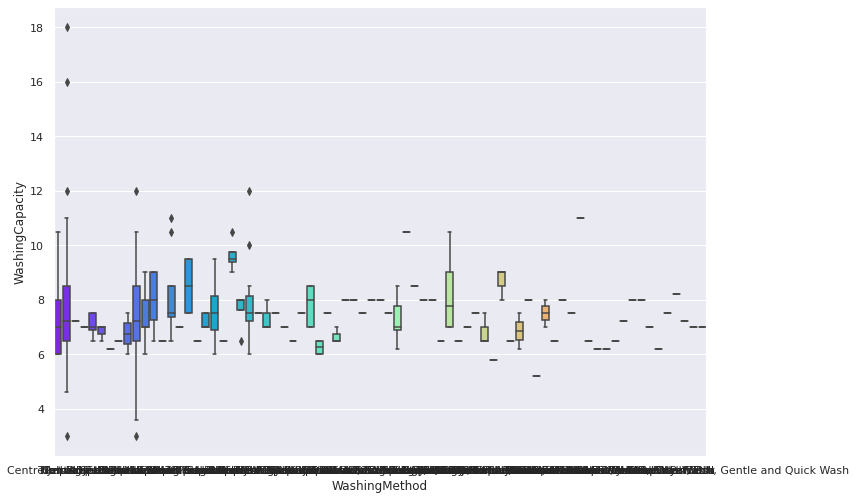

In [41]:
sns.boxplot(x='WashingMethod',y='WashingCapacity',data=df,palette='rainbow')

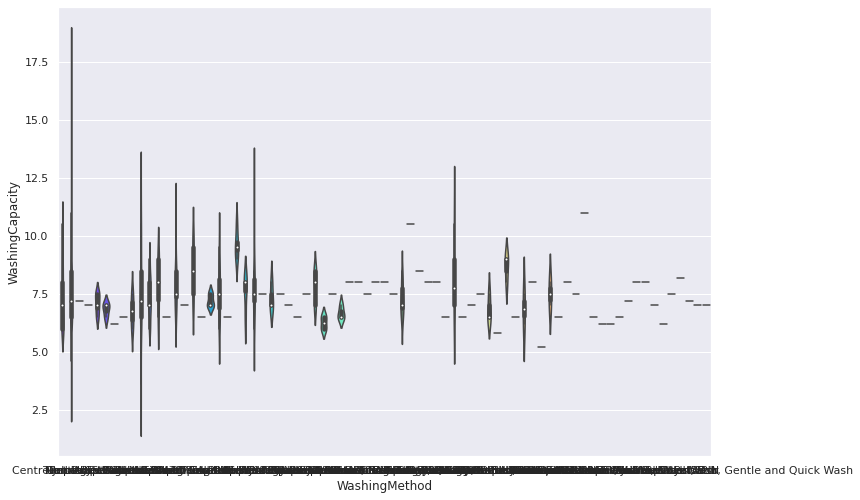

In [42]:
sns.violinplot(x='WashingMethod',y='WashingCapacity',data=df,palette='rainbow')

In [43]:
df.WashingMethod.value_counts()

Pulsator                    276
Tumble                       96
Tumble Wash                  69
Pulsator Wash                44
Center Jet Pulsator Wash     22
                           ... 
Tristorm Pulsator Wash        1
Normal Wash                   1
Fully Automatic               1
3 Smart Motion                1
Triadic Pulsator              1
Name: WashingMethod, Length: 75, dtype: int64

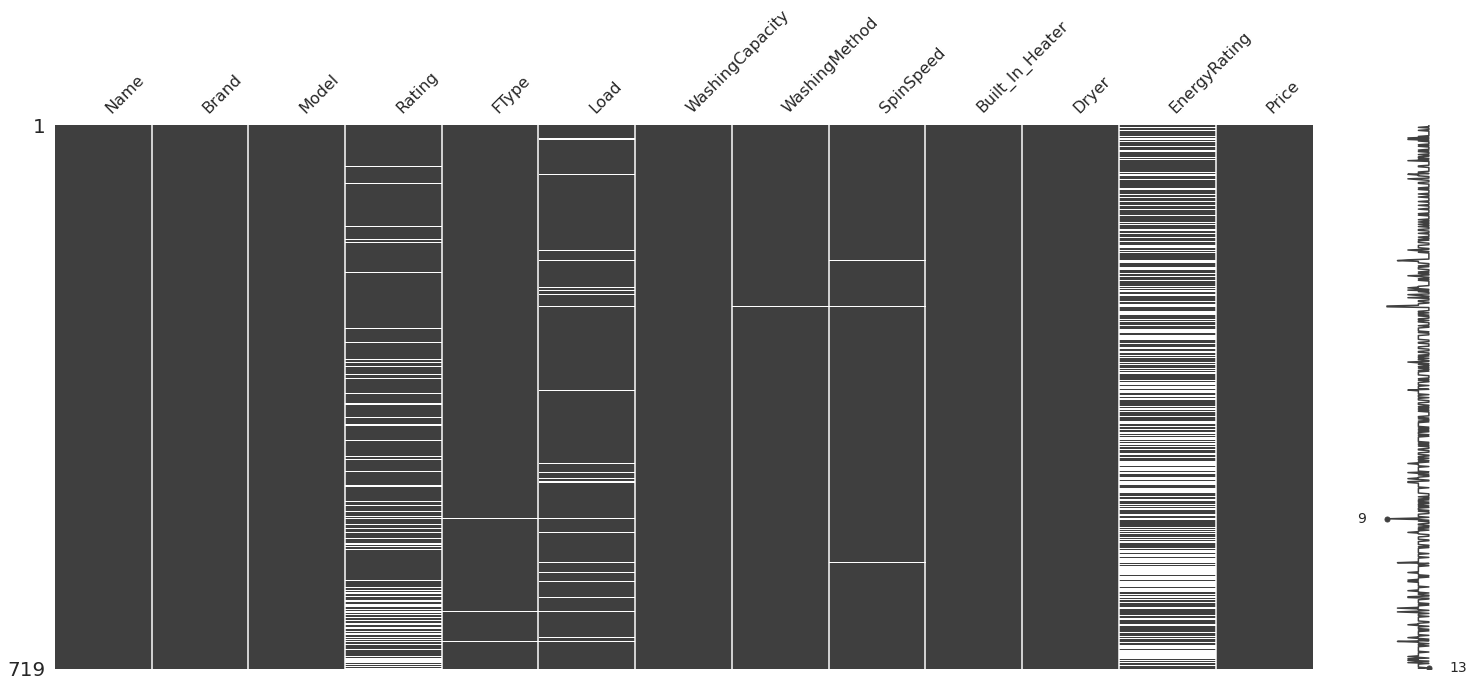

In [44]:
msno.matrix(df)

In [45]:
display(df.dropna(subset=['Load','WashingMethod','SpinSpeed','EnergyRating'], how='all',inplace=True))

None

In [46]:
#Pulsator
df['WashingMethod'].fillna('Pulsator', inplace=True)

In [47]:
null_count=round(100*(df.isnull().sum()/len(df.index)),2)
null_count

Name                0.00
Brand               0.00
Model               0.00
Rating             13.37
FType               0.70
Load                4.60
WashingCapacity     0.00
WashingMethod       0.00
SpinSpeed           0.28
Built_In_Heater     0.00
Dryer               0.00
EnergyRating       42.76
Price               0.00
dtype: float64

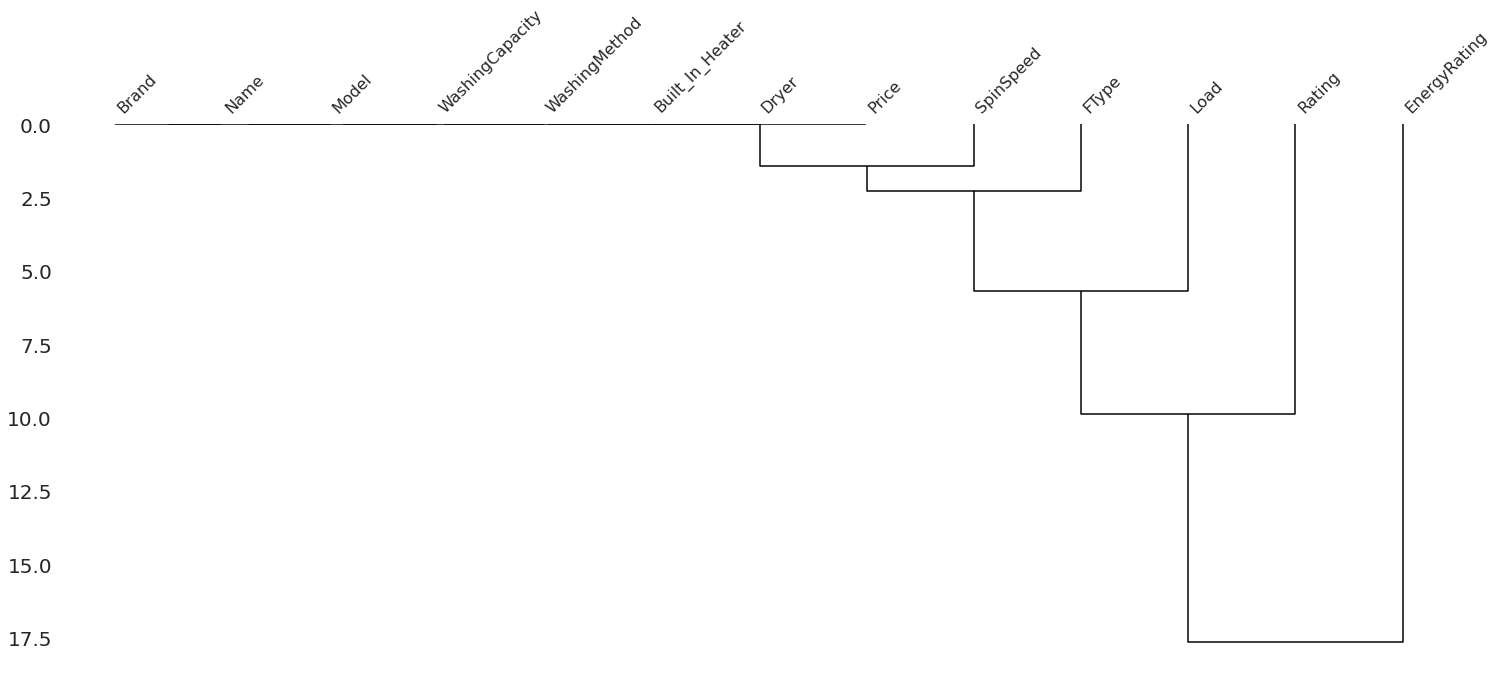

In [48]:
msno.dendrogram(df)

In [49]:
df.SpinSpeed.unique()

array(['1000 rpm', '1500 rpm', '680 rpm', '740 rpm', '1450 rpm',
       '1350 rpm', '700 rpm', '780 rpm', '1350 RPM', '1400 rpm',
       '1300 rpm', '800 rpm', '1200 rpm', '1000 RPM', '720 rpm',
       '750 rpm', '1200 RPM', '750 RPM', '680 RPM', '1400 RPM',
       '1300 RPM', '665 rpm', nan, '740 RPM', '780 RPM', '800 RPM',
       '670 rpm', '1600 rpm', '1450 RPM', '700 RPM', '1440 rpm',
       '730 rpm', '600 rpm', '770 rpm', '300 rpm', '702 rpm', '1198 RPM',
       '180 rpm', '702 RPM', '1500 RPM', '1250 rpm', '980 RPM',
       '1320 rpm', '690 RPM', '550 rpm', '720 RPM'], dtype=object)

In [50]:
df.SpinSpeed = [str(x).replace('RPM',' ') for x in df.SpinSpeed]
df.SpinSpeed = [str(x).replace('rpm',' ') for x in df.SpinSpeed]
#df['WashingCapacity'].str.translate(str.maketrans({'kg':''})).astype(float) 
df.SpinSpeed = df.SpinSpeed.apply(pd.to_numeric, errors='coerce')
#df = df.astype(int)


In [51]:
df.SpinSpeed.unique()

array([1000., 1500.,  680.,  740., 1450., 1350.,  700.,  780., 1400.,
       1300.,  800., 1200.,  720.,  750.,  665.,   nan,  670., 1600.,
       1440.,  730.,  600.,  770.,  300.,  702., 1198.,  180., 1250.,
        980., 1320.,  690.,  550.])

In [52]:
df.SpinSpeed.fillna('300', inplace=True)

In [53]:
null_count=round(100*(df.isnull().sum()/len(df.index)),2)
null_count

Name                0.00
Brand               0.00
Model               0.00
Rating             13.37
FType               0.70
Load                4.60
WashingCapacity     0.00
WashingMethod       0.00
SpinSpeed           0.00
Built_In_Heater     0.00
Dryer               0.00
EnergyRating       42.76
Price               0.00
dtype: float64

In [54]:
df.Dryer.unique()

array(['Air Turbo Drying System', 'Spin Dryer', 'Air Dry', 'Spin Dry',
       'Swift Dry', 'Condenser Drying', 'Hot Wind', 'Wind Jet Dry', 'No',
       'Plastic Spin Dryer', 'Stainless Steel Spin Dryer', 'Max Dry',
       'Spin', 'Steam Dry', '70 % Air Dryer', 'Turbo Air Dry',
       'Turbo Dry', 'Spin Air Dry'], dtype=object)

In [55]:
null_count=round(100*(df.isnull().sum()/len(df.index)),2)
null_count

Name                0.00
Brand               0.00
Model               0.00
Rating             13.37
FType               0.70
Load                4.60
WashingCapacity     0.00
WashingMethod       0.00
SpinSpeed           0.00
Built_In_Heater     0.00
Dryer               0.00
EnergyRating       42.76
Price               0.00
dtype: float64

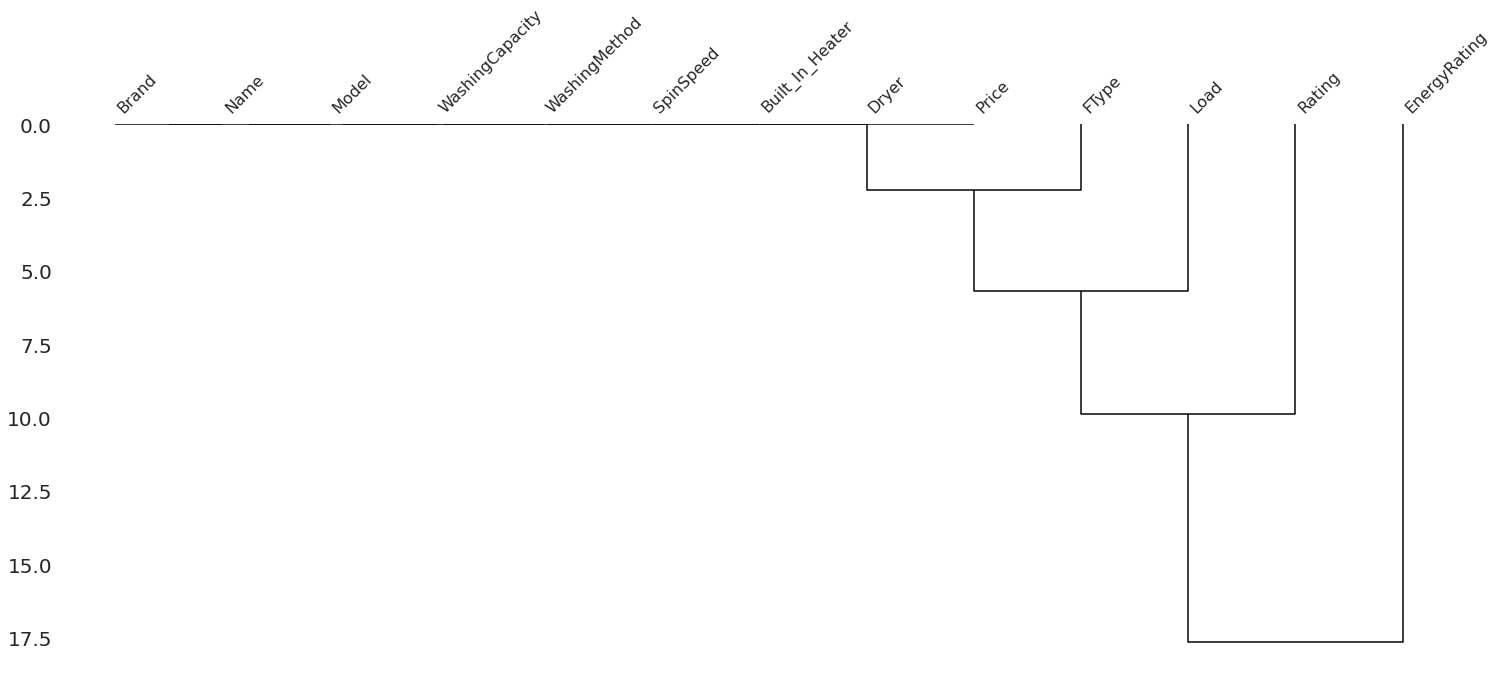

In [56]:
msno.dendrogram(df)

In [57]:
df.FType.unique()

array(['Fully Automatic', 'Semi Automatic', 'Washer only',
       'washer with dryer', nan], dtype=object)

In [58]:
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams["figure.figsize"]=(100,200)
plt.rcParams['font.size'] = 15.0
mosaic(df, ['Brand', 'FType']);

In [59]:
df.FType.fillna('Fully Automatic', inplace=True)

In [60]:
df.Load.unique()

array(['Front Load', 'Top Load', nan], dtype=object)

In [61]:
#Top Load
df.Load.fillna('Top Load', inplace=True)

In [62]:
import random
df['Rating'].fillna(round(random.uniform(3.0,3.5),1), inplace=True)
df.head()

Name  ...  Price
0  SAMSUNG 6 kg 5 Star Inverter with Hygiene Stea...  ...  22399
1  Candes 6.5 kg Semi Automatic Top Load Red, Whi...  ...   6799
2  SAMSUNG 6.5 kg Diamond Drum feature Fully Auto...  ...  14499
3  SAMSUNG 7.2 kg with Double Storm Technology Se...  ...   9699
4  Whirlpool 7 kg 5 Star,Turbo Scrub Technology S...  ...  10240

[5 rows x 13 columns]

In [63]:
ss = 0
p = 0

while p in df['Price'] and ss in df['SpinSpeed']:
  if p>16000 and ss>1000:
    df['EnergyRating'].fillna("5", inplace= True)
  elif p>=10000 and (ss<1000 and ss>700):
    df['EnergyRating'].fillna("4", inplace= True)
  else:
    df['EnergyRating'].fillna("3", inplace= True)
  ss += 1
  p += 1

# ILOC

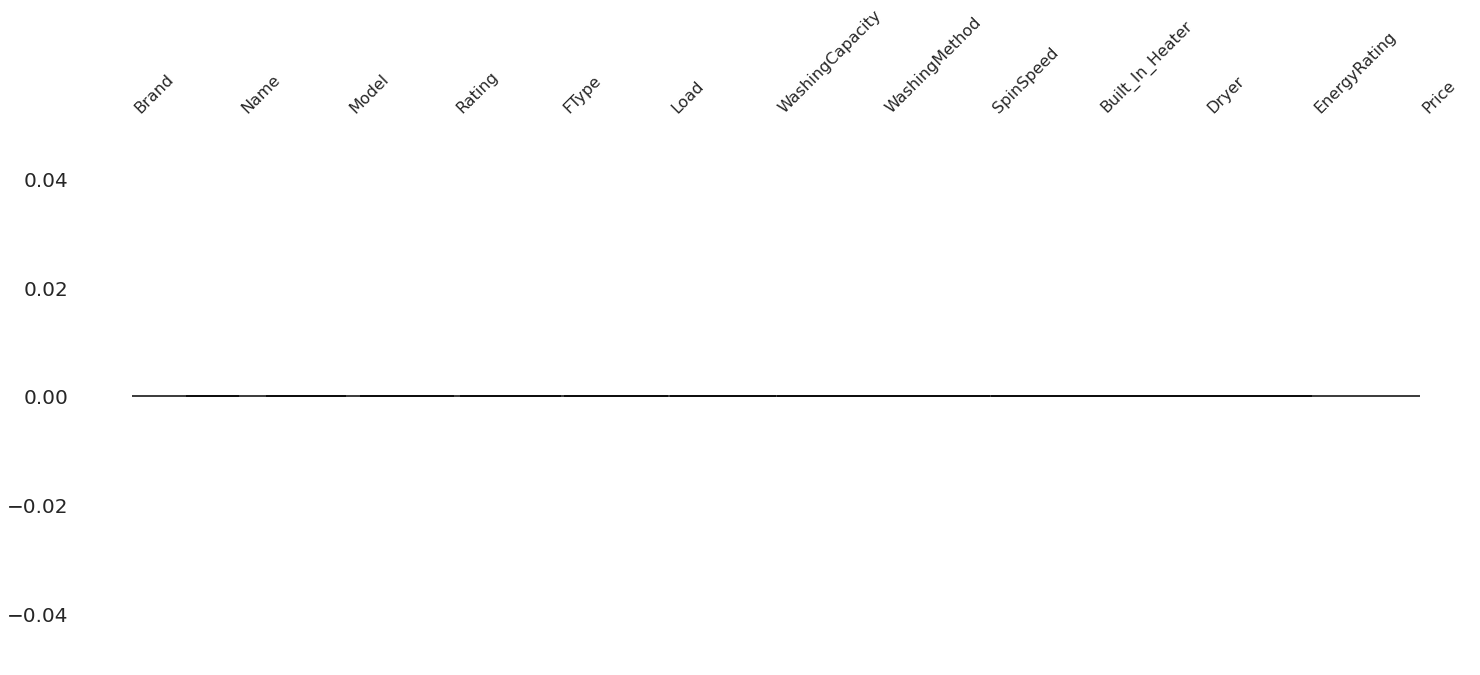

In [64]:
msno.dendrogram(df)

In [65]:
null_count=round(100*(df.isnull().sum()/len(df.index)),2)
null_count

Name               0.0
Brand              0.0
Model              0.0
Rating             0.0
FType              0.0
Load               0.0
WashingCapacity    0.0
WashingMethod      0.0
SpinSpeed          0.0
Built_In_Heater    0.0
Dryer              0.0
EnergyRating       0.0
Price              0.0
dtype: float64

In [66]:
df.EnergyRating.unique()

array([5.0, 3.0, '3', 4.0], dtype=object)

In [67]:
df.EnergyRating.astype(float)

0      5.0
1      5.0
2      3.0
3      3.0
4      5.0
      ... 
755    3.0
756    5.0
757    5.0
759    5.0
760    5.0
Name: EnergyRating, Length: 718, dtype: float64

In [68]:
"""ss = 0
p = 0

while p in df['Price'] and ss in df['SpinSpeed']:
  if p>16000 and ss>1000:
    df['EnergyRating'].fillna("5", inplace= True)
  elif p>=10000 and (ss<1000 and ss>700):
    df['EnergyRating'].fillna("4", inplace= True)
  else:
    df['EnergyRating'].fillna("3", inplace= True)
"""

'ss = 0\np = 0\n\nwhile p in df[\'Price\'] and ss in df[\'SpinSpeed\']:\n  if p>16000 and ss>1000:\n    df[\'EnergyRating\'].fillna("5", inplace= True)\n  elif p>=10000 and (ss<1000 and ss>700):\n    df[\'EnergyRating\'].fillna("4", inplace= True)\n  else:\n    df[\'EnergyRating\'].fillna("3", inplace= True)\n'

In [69]:
df.Dryer.value_counts()

Air Dry                       373
Air Turbo Drying System       179
Spin Dry                      101
Swift Dry                      36
Spin Dryer                      9
Spin                            4
Condenser Drying                4
Wind Jet Dry                    2
Turbo Dry                       1
Spin Air Dry                    1
Plastic Spin Dryer              1
Turbo Air Dry                   1
Hot Wind                        1
70 % Air Dryer                  1
Stainless Steel Spin Dryer      1
No                              1
Max Dry                         1
Steam Dry                       1
Name: Dryer, dtype: int64

In [70]:
df.Dryer.unique()

array(['Air Turbo Drying System', 'Spin Dryer', 'Air Dry', 'Spin Dry',
       'Swift Dry', 'Condenser Drying', 'Hot Wind', 'Wind Jet Dry', 'No',
       'Plastic Spin Dryer', 'Stainless Steel Spin Dryer', 'Max Dry',
       'Spin', 'Steam Dry', '70 % Air Dryer', 'Turbo Air Dry',
       'Turbo Dry', 'Spin Air Dry'], dtype=object)

In [71]:
proflie = ProfileReport(df, title="FINAL REPORT", html={'style':{'full_width':True}})

In [73]:
proflie.to_notebook_iframe()

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile.to_file(output_file="FINAL_EDA_REPORT.html")